<a href="https://colab.research.google.com/github/Tenntucky/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Kole_Goldsberry_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
col_headers = ['Class Name', 'handicapped-infants',
            'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
            'physician-fee-freeze', 'el-salvador-aid',
            'religious-groups-in-schools', 'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras', 'mx-missile', 'immigration',
            'synfuels-corporation-cutback', 'education-spending',
            'superfund-right-to-sue', 'crime', 'duty-free-exports', 
            'export-administration-act-south-africa']


In [0]:
df = pd.read_csv('house-votes-84.data', header=None, names=col_headers)
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df.shape

(435, 17)

In [0]:
df = df.replace('?', '_')
df.head(3)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,_,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,_
2,democrat,_,y,y,_,y,y,n,n,n,n,y,n,y,y,n,n


In [0]:
df_reps = df[df['Class Name'] == 'republican']

df_dems = df[df['Class Name'] == 'democrat']

In [0]:
df_reps.head()
df_reps.shape

(168, 17)

In [0]:
df_dems.head()
df_dems.shape

(267, 17)

In [0]:
df_dems.describe(exclude='number').T

,count,unique,top,freq
Class Name,267,1,democrat,267
handicapped-infants,267,3,y,156
water-project-cost-sharing,267,3,y,120
adoption-of-the-budget-resolution,267,3,y,231
physician-fee-freeze,267,3,n,245
el-salvador-aid,267,3,n,200
religious-groups-in-schools,267,3,n,135
anti-satellite-test-ban,267,3,y,200
aid-to-nicaraguan-contras,267,3,y,218
mx-missile,267,3,y,188


In [0]:
df_dems['handicapped-infants'].value_counts() # y, n, _
# Y: (1)156, 102, 9; (2)120, 119, 28; (3)231, 29, 7; (4)14, 245, 8;
# (5)55, 200, 12; (6)123, 135, 9; (7)200, 59, 8; (8)218, 45, 4; (9)188, 60, 19; (10)124, 139, 4; 
# (11)129, 126, 12; (12)36, 213, 18; (13)73, 179, 15;
# (14)90, 167, 10; (15)160, 91, 16; (16)173, 12, 82;

y    156
n    102
_      9
Name: handicapped-infants, dtype: int64

In [0]:
d1 = 156/(267 - 9) # 0.6
d2 = 120/(267 - 28) # 0.5
d3 = 231/(267 - 7) # 0.88
d4 = 14/(267 - 8) # 0.54
d5 = 55/(267 - 12) # 0.21   &
d6 = 123/(267 - 9) # 0.47
d7 = 200/(267 - 8) # 0.77
d8 = 218/(267 - 4) # 0.82
d9 = 188/(267 - 19) # 0.75
d10 = 124/(267 - 4) # 0.47   &
d11 = 129/(267 - 12) # 0.5
d12 = 36/(267 - 18) # 0.14
d13 = 73/(267 - 15) # 0.28
d14 = 90/(267 - 10) # 0.35
d15 = 160/(267 - 16) # 0.63   &
d16 = 173/(267 - 82) # 0.93
print('d1:', d1, 'd2:', d2, 'd3:', d3, 'd4:', d4, 'd5:', d5, 'd6:', d6, 'd7:', d7, 
      'd8:', d8, 'd9:', d9, 'd10:', d10, 'd11:', d11, 'd12:', d12, 'd13:', d13, 
      'd14:', d14, 'd15:', d15, 'd16:', d16)

d1: 0.6046511627906976 d2: 0.502092050209205 d3: 0.8884615384615384 d4: 0.05405405405405406 d5: 0.21568627450980393 d6: 0.47674418604651164 d7: 0.7722007722007722 d8: 0.8288973384030418 d9: 0.7580645161290323 d10: 0.4714828897338403 d11: 0.5058823529411764 d12: 0.14457831325301204 d13: 0.2896825396825397 d14: 0.35019455252918286 d15: 0.6374501992031872 d16: 0.9351351351351351


In [0]:
df_reps['export-administration-act-south-africa'].value_counts() 
# Y: (1)31, 134, 3; (2)75, 73, 20; (3)22, 142, 4; (4)163, 2, 3;
# (5)157, 8, 3; (6)149, 17, 2; (7)39, 123, 6; (8)24, 133, 11; (9)19, 146, 3; (10)92, 73, 3; (11)21, 138, 9; (12)135, 20, 13;
# (13)136, 22, 10; (14)158, 3, 7; (15)14, 142, 12; (16)96, 50, 22 

y    96
n    50
_    22
Name: export-administration-act-south-africa, dtype: int64

In [0]:
r1 = 31/(168 - 3) # 0.18
r2 = 75/(168 - 20) # 0.5
r3 = 22/(168 - 4) # 0.13
r4 = 163/(168 - 3)  # 0.98
r5 = 157/(168 - 3) # 0.95   &
r6 = 149/(168 - 2) # 0.89
r7 = 39/(168 - 6) # 0.24
r8 = 24/(168 - 11) # 0.15
r9 = 19/(168 - 3) # 0.11
r10 = 92/(168 - 3) # 0.55   &
r11 = 21/(168 - 9) # 0.13
r12 = 135/(168 - 13) # 0.87
r13 = 136/(168 - 10) # 0.86
r14 = 158/(168 - 7) # 0.98
r15 = 14/(168 - 12) # 0.08   &
r16 = 96/(168 - 22) # 0.65
print('r1:', r1, 'r2:', r2, 'r3:', r3, 'r4:', r4, 'r5:', r5, 'r6:', r6, 'r7:', r7, 
      'r8:', r8, 'r9:', r9, 'r10:', r10, 'r11:', r11, 'r12:', r12, 'r13:', r13, 
      'r14:', r14, 'r15:', r15, 'r16:', r16)

r1: 0.18787878787878787 r2: 0.5067567567567568 r3: 0.13414634146341464 r4: 0.9878787878787879 r5: 0.9515151515151515 r6: 0.8975903614457831 r7: 0.24074074074074073 r8: 0.15286624203821655 r9: 0.11515151515151516 r10: 0.5575757575757576 r11: 0.1320754716981132 r12: 0.8709677419354839 r13: 0.8607594936708861 r14: 0.9813664596273292 r15: 0.08974358974358974 r16: 0.6575342465753424


In [0]:
df_dems = df_dems.replace('y', 1)
df_dems = df_dems.replace('n', 0)
df_dems = df_dems.replace('_', np.nan)

df_reps = df_reps.replace('y', 1)
df_reps = df_reps.replace('n', 0)
df_reps = df_reps.replace('_', np.nan)

In [0]:
df_dems['adoption-of-the-budget-resolution'].std(skipna=True,ddof=1)

0.3154048976795528

In [0]:
df_dems['adoption-of-the-budget-resolution'].mean(skipna=True)

0.8884615384615384

In [0]:
df_reps['adoption-of-the-budget-resolution'].std(skipna=True,ddof=1)

0.34185330768366606

In [0]:
df_reps['adoption-of-the-budget-resolution'].mean(skipna=True)

0.13414634146341464

In [0]:
pvalue_list = []

for _ in range(260):
  mu1 = 0.8884615384615384
  sigma1 = 0.3154048976795528
  n1 = 260
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  
  mu2 = 0.13414634146341464
  sigma2 = 0.34185330768366606
  n2 = 164
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

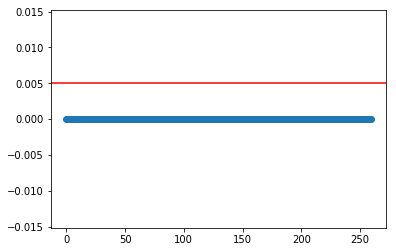

In [0]:
plt.scatter(list(range(260)), pvalue_list)
plt.axhline(y=0.005, color='r');

In [0]:
pvalue_arr = np.array(pvalue_list)
np.sum(pvalue_arr < 0.01)

260

In [0]:
df_dems['crime'].std(skipna=True,ddof=1)

0.4779615336263577

In [0]:
df_dems['crime'].mean(skipna=True)

0.35019455252918286

In [0]:
df_reps['crime'].std(skipna=True,ddof=1)

0.13564888911455342

In [0]:
df_reps['crime'].mean(skipna=True)

0.9813664596273292

In [0]:
pvalue_list = []

for _ in range(257):
  mu1 = 0.35019455252918286
  sigma1 = 0.4779615336263577
  n1 = 257
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  
  mu2 = 0.9813664596273292
  sigma2 = 0.13564888911455342
  n2 = 161
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

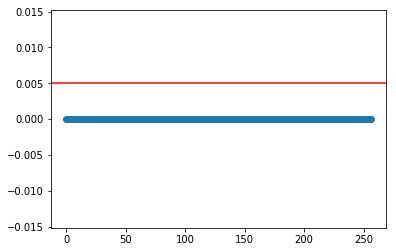

In [0]:
plt.scatter(list(range(257)), pvalue_list)
plt.axhline(y=0.005, color='r');

In [0]:
pvalue_arr = np.array(pvalue_list)
np.sum(pvalue_arr < 0.01)

257

In [0]:
df_dems['water-project-cost-sharing'].std(skipna=True,ddof=1)

0.50104493321917

In [0]:
df_dems['water-project-cost-sharing'].mean(skipna=True)

0.502092050209205

In [0]:
df_reps['water-project-cost-sharing'].std(skipna=True,ddof=1)

0.5016519868797793

In [0]:
df_reps['water-project-cost-sharing'].mean(skipna=True)

0.5067567567567568

In [0]:
pvalue_list = []

for _ in range(239):
  mu1 = 0.502092050209205
  sigma1 = 0.50104493321917
  n1 = 239
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  
  mu2 = 0.5067567567567568
  sigma2 = 0.5016519868797793
  n2 = 148
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

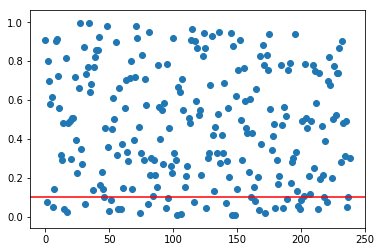

In [0]:
plt.scatter(list(range(239)), pvalue_list)
plt.axhline(y=0.1, color='r');

In [0]:
pvalue_arr = np.array(pvalue_list)
np.sum(pvalue_arr > 0.1)

206